# Task-3 : IRIS FLOWER CLASSIFICATION

        Author : Amancherla Srinivasa Sai Kritin
        Domain : Data Science

## Dataset Information
The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.

Attribute Information:

sepal length in cm
sepal width in cm
petal length in cm
petal width in cm
class:
    
    
-- Iris Setosa -- Iris Versicolour -- Iris Virginica

In [185]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [163]:
df = pd.read_csv(R"C:\Users\kriti\Downloads\Data\IRIS.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [164]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [165]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## Preprocessing the dataset

In [144]:

df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

## Exploratory Data Analysis

### Histograms


<Axes: >

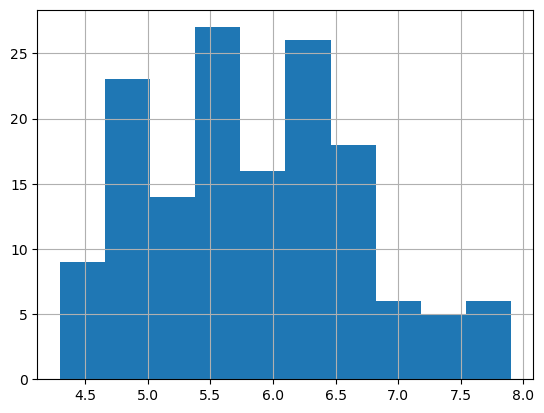

In [145]:

df['sepal_length'].hist()

<Axes: >

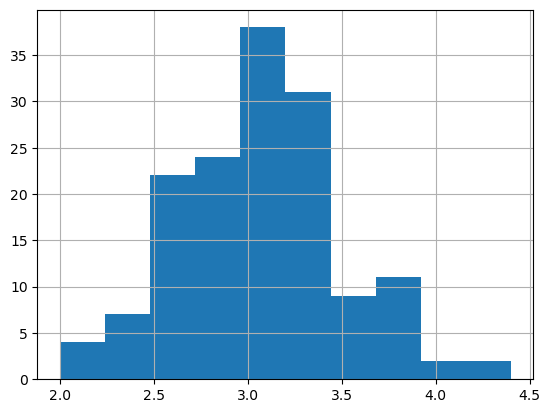

In [146]:
df['sepal_width'].hist()

<Axes: >

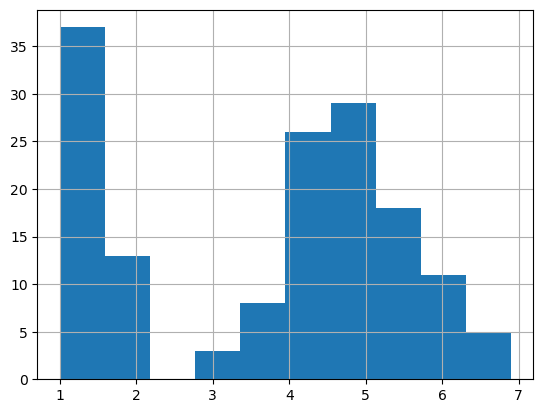

In [147]:
df['petal_length'].hist()

<Axes: >

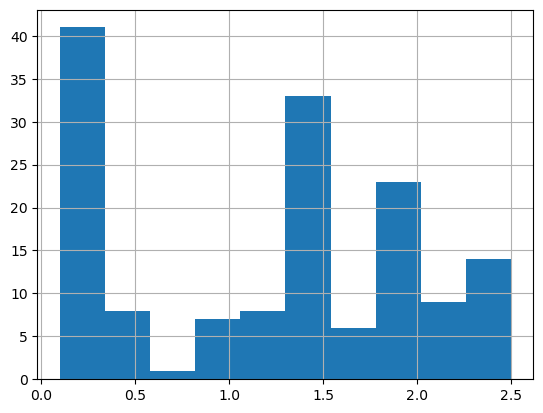

In [148]:
df['petal_width'].hist()

### scatterplot


In [149]:

colors = ['red', 'yellow', 'purple']
species = ['Iris-virginica','Iris-versicolor','Iris-setosa']

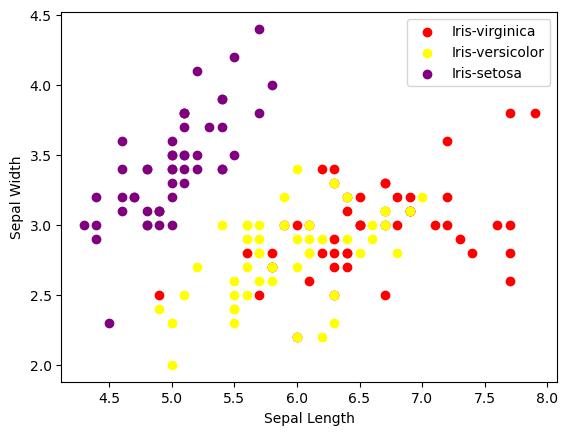

In [150]:
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['sepal_length'], x['sepal_width'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

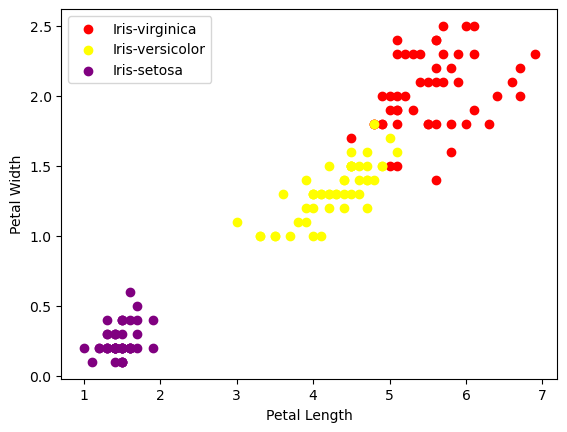

In [151]:
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['petal_length'], x['petal_width'], c = colors[i], label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

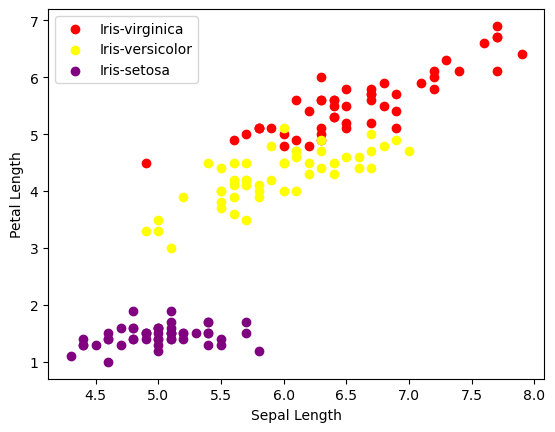

In [152]:
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['sepal_length'], x['petal_length'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()

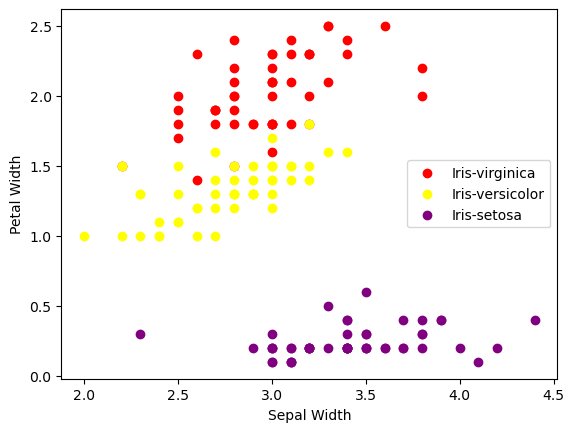

In [154]:
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['sepal_width'], x['petal_width'], c = colors[i], label=species[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()

### Coorelation Matrix

In [127]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<Axes: >

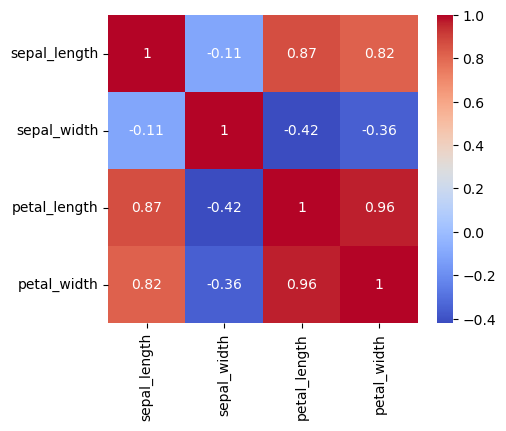

In [157]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, ax=ax, cmap = 'coolwarm')

### Label Encoder

In [158]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [166]:
df['species'] = le.fit_transform(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Model Training

In [168]:
from sklearn.model_selection import train_test_split
# train - 70
# test - 30
X = df.drop(columns=['species'])
Y = df['species']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

#### logistic regression 


In [169]:

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [172]:

model.fit(x_train, y_train)

LogisticRegression()

In [171]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  100.0


### Decision Tree

In [176]:

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [178]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [179]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  95.55555555555556


### Elbow Technique

In [188]:
corr_mat = df.corr()
print(corr_mat)

              sepal_length  sepal_width  petal_length  petal_width   species
sepal_length      1.000000    -0.109369      0.871754     0.817954  0.782561
sepal_width      -0.109369     1.000000     -0.420516    -0.356544 -0.419446
petal_length      0.871754    -0.420516      1.000000     0.962757  0.949043
petal_width       0.817954    -0.356544      0.962757     1.000000  0.956464
species           0.782561    -0.419446      0.949043     0.956464  1.000000


In [189]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

In [192]:
train, test = train_test_split(df, test_size = 0.25)
print(train.shape)
print(test.shape)

(112, 5)
(38, 5)


In [194]:
train_X = train[['sepal_length', 'sepal_width', 'petal_length',
                 'petal_width']]
train_y = train.species

test_X = test[['sepal_length', 'sepal_width', 'petal_length',
                 'petal_width']]
test_y = test.species

In [195]:
train_X.head()

,sepal_length,sepal_width,petal_length,petal_width
87,6.3,2.3,4.4,1.3
106,4.9,2.5,4.5,1.7
24,4.8,3.4,1.9,0.2
96,5.7,2.9,4.2,1.3
68,6.2,2.2,4.5,1.5


In [196]:
test_y.head()

115    2
5      0
90     1
102    2
97     1
Name: species, dtype: int32

In [198]:
model = LogisticRegression()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('Accuracy:',metrics.accuracy_score(prediction,test_y))

Accuracy: 0.9473684210526315


In [199]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_mat = confusion_matrix(test_y,prediction)
print("Confusion matrix: \n",confusion_mat)

Confusion matrix: 
 [[ 9  0  0]
 [ 0 10  2]
 [ 0  0 17]]


In [203]:
#Detaile dclassification report
from sklearn.metrics import classification_report
print(classification_report(prediction,test_y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.83      1.00      0.91        10
           2       1.00      0.89      0.94        19

    accuracy                           0.95        38
   macro avg       0.94      0.96      0.95        38
weighted avg       0.96      0.95      0.95        38

